In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
plt.style.use(['fivethirtyeight'])
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{helvet}',
    r'\usepackage{sansmath}',
    r'\sansmath']
plt.rc('text', usetex=True)
%matplotlib inline

def mean_flux(s, m_nosupp):
    '''
    Input
    s: suppression at this angle
    m_nosupp: I magnitude of source with no suppression. (E.g., for sun, I=V=-26).
    Output
    μ: mean incident flux on camera of interest [ct/px/s]
    '''
    return 6.59 * s * 10**(-0.4*m_nosupp)

def suppression(θ):
    '''
    Input
    θ: angle from the camera boresight to given point-source of interest [degrees]
    Output
    s: suppression factor, F_obs/F_{no suppression}
    '''
    if θ <= 17:
        s = 1.
    if 17 < θ <= 37:
        s = 10**(-7. * (ang-17) / (37-17.))
    if 37 < θ <= 60:
        s = 1e-7
    if θ > 60:
        s = 1e-9
    return s

def rms(μ):
    '''
    Input
    μ: mean incident flux on camera of interest [ct/px/s]
    Output
    σ: ct/px RMS per 2 sec image
    '''
    return (2*μ)**(1/2.)

θ = np.arange(0,90,0.1)
mags = {'sun':-26., 'moon':-13., 'earth':-13+(5/2.*np.log10(80))} # "Earth is 80x brighter than Moon"
μ, σ = {'sun':[], 'moon':[], 'earth':[]}, {'sun':[], 'moon':[], 'earth':[]}

for k in mags.keys():
    for ang in θ:
        s = suppression(ang)
        μ[k].append(mean_flux(s, mags[k]))
        σ[k].append(rms(mean_flux(s, mags[k])))

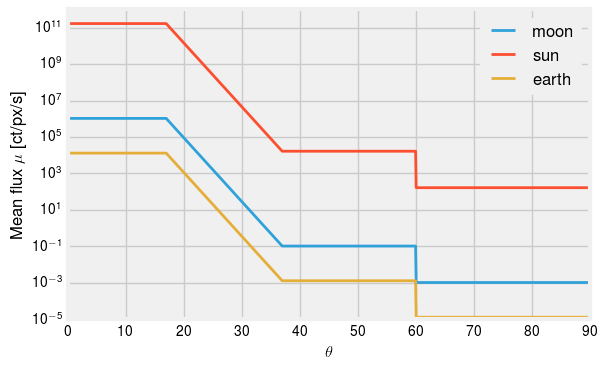

In [6]:
f, ax = plt.subplots()
for k in mags.keys():
    ax.plot(θ, μ[k], label=k, lw=2)
ax.legend()
ax.set(xlabel=r'$\theta$', ylabel='Mean flux $\mu$ [ct/px/s] ', yscale='log');

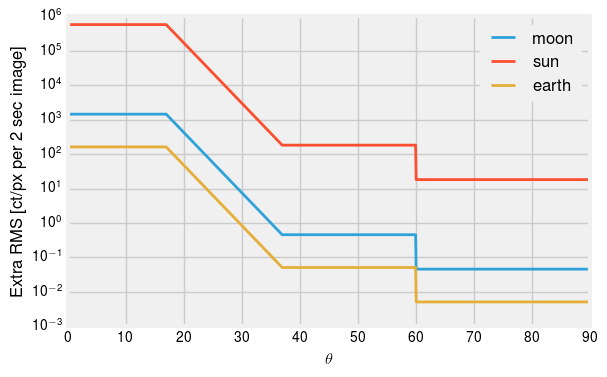

In [7]:
f, ax = plt.subplots()
for k in mags.keys():
    ax.plot(θ, σ[k], label=k, lw=2)
ax.legend()
ax.set(xlabel=r'$\theta$', ylabel='Extra RMS [ct/px per 2 sec image]', yscale='log');